## Minor Project
A computational approach to support border surveillance 

## Import Packages
We have used in following the library as follows :
* **NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* **GDAL**, also known as GDAL/OGR, is a library of tools used for manipulating geospatial data. GDAL works on both raster and vector data types, and is an incredible useful tool to be familiar with when working with geospatial data.
* **Elevation** provides easy download, cache and access of the global datasets SRTM 30m Global 1 arc second V003 elaborated by NASA and NGA hosted on Amazon S3 and SRTM 90m Digital Elevation Database v4.1 elaborated by CGIAR-CSI.
* **Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible. Create publication quality plots. Make interactive figures that can zoom, pan, update.

In [2]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import elevation
import mahotas
import cv2
from image_slicer import slice
from PIL import Image
from IPython.display import Image, display

## Fetch and Read DEM data
We can use GDAL in order to open the file and read it in as a 2D array. Additionally, it is important to note that our DEM file has NaN values which will later cause Matplotlib to fail. Therefore, we’ll also mask these values out so that Matplotlib will be unaware of them.

In [3]:
filename = "Other/Data.tif"
gdal_data = gdal.Open(filename)
gdal_band = gdal_data.GetRasterBand(1)
nodataval = gdal_band.GetNoDataValue()

# convert to a numpy array
data_array = gdal_data.ReadAsArray().astype(np.float64)
data_array

# replace missing values if necessary
if np.any(data_array == nodataval):
    data_array[data_array == nodataval] = np.nan

## Visualize Data with Matplotlib
Now that we’ve read our data in, we’re ready to visualize the elevation using contour lines within Matplotlib (Note: We will be re-reading in the data again here due to NaN values).

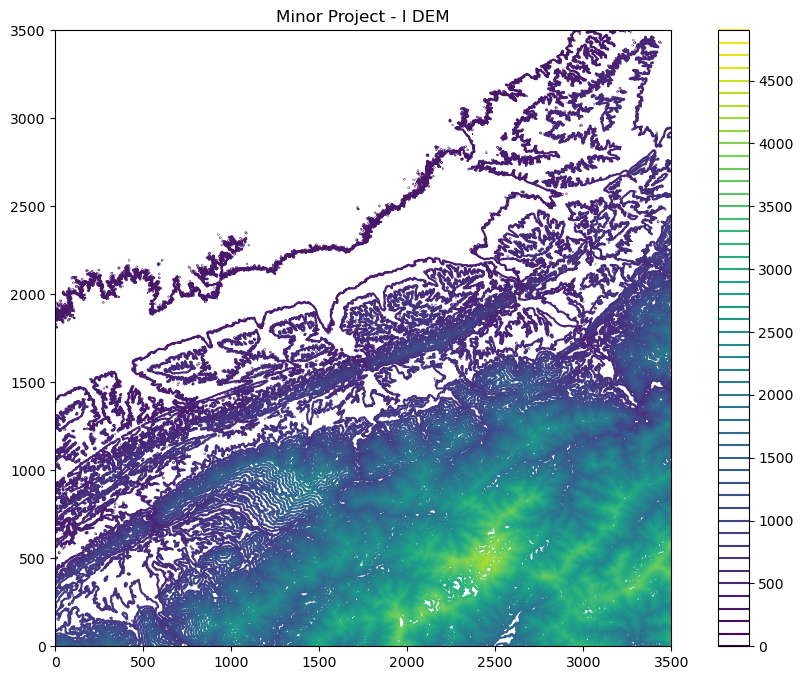

In [4]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contour(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 100)))
plt.title("Minor Project - I DEM")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([0, 3500])
plt.ylim([0, 3500])
plt.show()

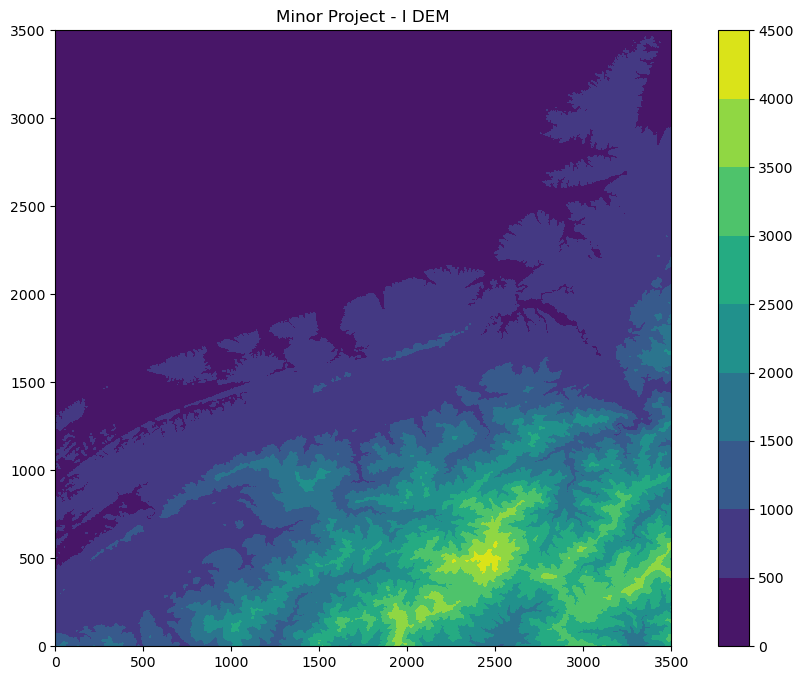

In [5]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Minor Project - I DEM")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([0, 3500])
plt.ylim([0, 3500])
plt.show()

## Adding Grid Lines to the DEM

A set of grids of size n × n is superimposed over the landscape. This helps in reducing the time and space complexity of further computation by breaking the landscape into m grids where, where m = A/(n×n), A is the total area of the Landscape.

Matplotlib is a library in Python and it is numerical – mathematical extension for NumPy library. Pyplot is a state-based interface to a Matplotlib module which provides a MATLAB-like interface.
* The **grid()** function in pyplot module of matplotlib library is used to configure the grid lines.
Syntax: matplotlib.pyplot.grid(b=None, which=’major’, axis=’both’, \*\*kwargs)
* The **xlim()** function in pyplot module of matplotlib library is used to get or set the x-limits of the current axes.
Syntax: matplotlib.pyplot.xlim(*args, **kwargs)
* The **ylim()** function in pyplot module of matplotlib library is used to get or set the y-limits of the current axes.
Syntax: matplotlib.pyplot.ylim(*args, **kwargs)

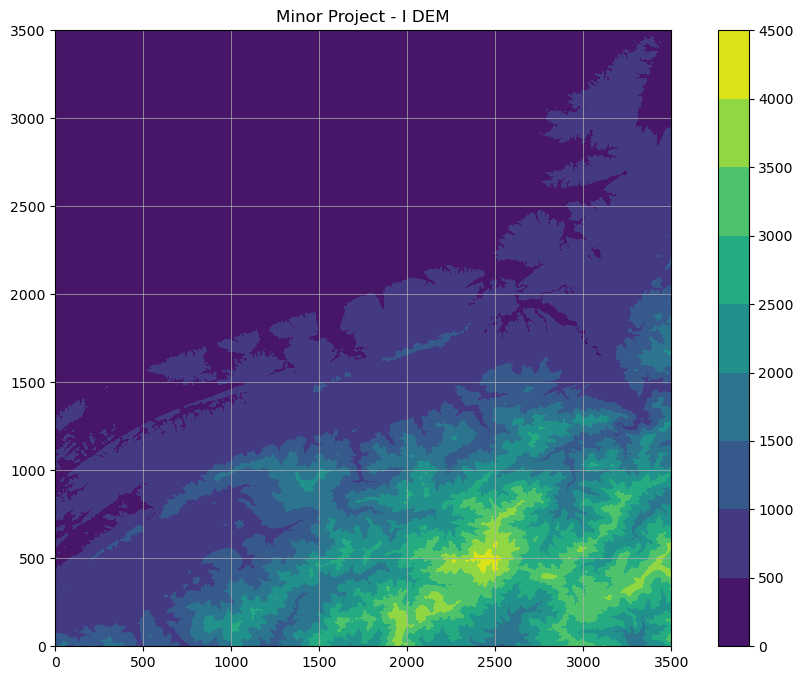

In [7]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
plt.contourf(data_array, cmap = "viridis", 
            levels = list(range(0, 5000, 500)))
plt.title("Minor Project - I DEM")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim([0, 3500])
plt.ylim([0, 3500])
plt.grid(linewidth = 0.5)
plt.show()

## Tiling the Image into N x N Equal Parts.

Splitting images into tiles. 

DEM will be splitted into 6 x 6 Equal Parts for Scoring and Ranking.

In [9]:
slice('Data.png', 36)
slice('Data1.png', 36)

(<Tile #1 - Data1_01_01.png>,
 <Tile #2 - Data1_01_02.png>,
 <Tile #3 - Data1_01_03.png>,
 <Tile #4 - Data1_01_04.png>,
 <Tile #5 - Data1_01_05.png>,
 <Tile #6 - Data1_01_06.png>,
 <Tile #7 - Data1_02_01.png>,
 <Tile #8 - Data1_02_02.png>,
 <Tile #9 - Data1_02_03.png>,
 <Tile #10 - Data1_02_04.png>,
 <Tile #11 - Data1_02_05.png>,
 <Tile #12 - Data1_02_06.png>,
 <Tile #13 - Data1_03_01.png>,
 <Tile #14 - Data1_03_02.png>,
 <Tile #15 - Data1_03_03.png>,
 <Tile #16 - Data1_03_04.png>,
 <Tile #17 - Data1_03_05.png>,
 <Tile #18 - Data1_03_06.png>,
 <Tile #19 - Data1_04_01.png>,
 <Tile #20 - Data1_04_02.png>,
 <Tile #21 - Data1_04_03.png>,
 <Tile #22 - Data1_04_04.png>,
 <Tile #23 - Data1_04_05.png>,
 <Tile #24 - Data1_04_06.png>,
 <Tile #25 - Data1_05_01.png>,
 <Tile #26 - Data1_05_02.png>,
 <Tile #27 - Data1_05_03.png>,
 <Tile #28 - Data1_05_04.png>,
 <Tile #29 - Data1_05_05.png>,
 <Tile #30 - Data1_05_06.png>,
 <Tile #31 - Data1_06_01.png>,
 <Tile #32 - Data1_06_02.png>,
 <Tile #33 - Data

In [11]:
fact1 = float(input("Enter the probability of the Factor 1 : "))
fact2 = float(input("Enter the probability of the Factor 2 : "))
fact3 = float(input("Enter the probability of the Factor 3 : "))
if float((fact1 + fact2 + fact3)) == 1.0:
    print("GO AHEAD")
else:
    print("Your entry is wrong \nPlease entry the Probability Again")

Enter the probability of the Factor 1 : 0.5
Enter the probability of the Factor 2 : 0.4
Enter the probability of the Factor 3 : 0.1
GO AHEAD


In [33]:
pixelfact1 = []
pixelfact2 = []
pixelfact3 = []

In [34]:
for i in range(6):
    r1 = []
    r2 = []
    r3 = []
    for j in range(6):
        img1 = cv2.imread('Elevation/'+str(i)+str(j)+'.png')
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        result1 = np.average(img1)
        r1.append(int(result1))
        
        img2 = cv2.imread('Forest/'+str(i)+str(j)+'.png')
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        result2 = np.average(img2)
        r2.append(int(result2))
        
        img3 = cv2.imread('Water/'+str(i)+str(j)+'.png')
        img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
        result3 = np.average(img2)
        r3.append(int(result3))
    
    pixelfact1.append(r1)
    pixelfact2.append(r2)
    pixelfact3.append(r3)

In [35]:
print(pixelfact1)
print("\n")
print(pixelfact2)
print("\n")
print(pixelfact3)

[[63, 63, 63, 63, 64, 72], [63, 63, 63, 63, 66, 79], [63, 63, 66, 74, 77, 85], [65, 75, 81, 86, 94, 93], [77, 86, 100, 111, 122, 116], [84, 96, 112, 133, 131, 130]]


[[89, 94, 96, 94, 76, 60], [82, 91, 94, 113, 78, 77], [69, 84, 97, 99, 92, 84], [86, 72, 78, 93, 91, 92], [86, 82, 63, 70, 86, 91], [74, 82, 91, 88, 57, 77]]


[[89, 94, 96, 94, 76, 60], [82, 91, 94, 113, 78, 77], [69, 84, 97, 99, 92, 84], [86, 72, 78, 93, 91, 92], [86, 82, 63, 70, 86, 91], [74, 82, 91, 88, 57, 77]]


In [36]:
factscore1 = []
factscore2 = []
factscore3 = []

maxValue1 = np.amax(pixelfact1)
maxValue2 = np.amax(pixelfact2)
maxValue3 = np.amax(pixelfact3)
for i in range(6):
    r1 = []
    r2 = []
    r3 = []
    for j in range(6):
        a = pixelfact1[i][j]
        score1 = (a/maxValue1) * fact1
        r1.append(round(score1,4))
        
        b = pixelfact2[i][j]
        score2 = (b/maxValue2) * fact2
        r2.append(round(score2,4))
        
        c = pixelfact3[i][j]
        score3 = (c/maxValue3) * fact3
        r3.append(round(score3,4))
        
    factscore1.append(r1)
    factscore2.append(r2)
    factscore3.append(r3)

In [37]:
print("Ranking ")
for i in factscore1:
    for j in i:
        print(j, end=" ")
    print()
print("\n")
for i in factscore1:
    for j in i:
        print(j, end=" ")
    print()
print("\n")
for i in factscore1:
    for j in i:
        print(j, end=" ")
    print()

Ranking 
0.2368 0.2368 0.2368 0.2368 0.2406 0.2707 
0.2368 0.2368 0.2368 0.2368 0.2481 0.297 
0.2368 0.2368 0.2481 0.2782 0.2895 0.3195 
0.2444 0.282 0.3045 0.3233 0.3534 0.3496 
0.2895 0.3233 0.3759 0.4173 0.4586 0.4361 
0.3158 0.3609 0.4211 0.5 0.4925 0.4887 


0.2368 0.2368 0.2368 0.2368 0.2406 0.2707 
0.2368 0.2368 0.2368 0.2368 0.2481 0.297 
0.2368 0.2368 0.2481 0.2782 0.2895 0.3195 
0.2444 0.282 0.3045 0.3233 0.3534 0.3496 
0.2895 0.3233 0.3759 0.4173 0.4586 0.4361 
0.3158 0.3609 0.4211 0.5 0.4925 0.4887 


0.2368 0.2368 0.2368 0.2368 0.2406 0.2707 
0.2368 0.2368 0.2368 0.2368 0.2481 0.297 
0.2368 0.2368 0.2481 0.2782 0.2895 0.3195 
0.2444 0.282 0.3045 0.3233 0.3534 0.3496 
0.2895 0.3233 0.3759 0.4173 0.4586 0.4361 
0.3158 0.3609 0.4211 0.5 0.4925 0.4887 


## Implementation of Game Theory
Game theory from the field of applied mathematics is used to capture the interaction of the essential parameters and the adversaries. The degree of interaction is modelled using the AHP values obtained through multivariate analysis. These scores are provided to the focal grids where the interactions are captured. The process is repeated for all the m grids and a cost surface is superimposed over the landscape. The cost surface also helps the model rank the grids in order of their vulnerability.

In [46]:
result = []

for i in range(6):
    r = []
    for j in range(6):
        a = factscore1[i][j] + factscore2[i][j] + factscore1[i][j]
        r.append(round(a,4))
    result.append(r)

In [94]:
a = np.array(result)
print(a)

[[0.7886 0.8063 0.8134 0.8063 0.7502 0.7538]
 [0.7639 0.7957 0.8063 0.8736 0.7723 0.8666]
 [0.7178 0.7709 0.8396 0.9068 0.9047 0.9363]
 [0.7932 0.8189 0.8851 0.9758 1.0289 1.0249]
 [0.8834 0.9369 0.9748 1.0824 1.2216 1.1943]
 [0.8935 1.0121 1.1643 1.3115 1.1868 1.25  ]]


In [95]:
a_1d = a.flatten()
top_rank = []
N = 10
idx_1d = a_1d.argsort()[-N:]
x_idx, y_idx = np.unravel_index(idx_1d, a.shape)
print("Top 10 Ranking of the Tiles")
for x, y, in zip(x_idx, y_idx):
    top_rank.append(a[x][y])
print(top_rank)

Top 10 Ranking of the Tiles
[1.0121, 1.0249, 1.0289, 1.0824, 1.1643, 1.1868, 1.1943, 1.2216, 1.25, 1.3115]


In [96]:
print("Indexing of the Tiles for Patrolling Pathway")
for i in range(len(top_rank)):
    j,k = np.where(a == top_rank[i])
    print(j,k)

Indexing of the Tiles for Patrolling Pathway
[5] [1]
[3] [5]
[3] [4]
[4] [3]
[5] [2]
[5] [4]
[4] [5]
[4] [4]
[5] [5]
[5] [3]


Text(0.5, 1.0, 'Patrolling Pathway')

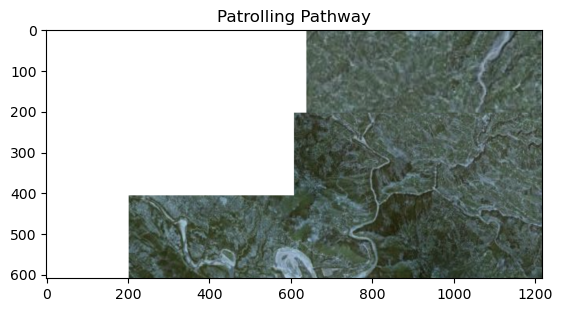

In [11]:
Image1 = cv2.imread('Final.png')
plt.imshow(Image1)
plt.title("Patrolling Pathway")